In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
data = pd.read_csv("governors_county.csv")
data

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,85415,87025,100
1,Delaware,New Castle County,280039,287633,100
2,Delaware,Sussex County,127181,129352,100
3,Indiana,Adams County,14154,14209,100
4,Indiana,Allen County,168312,169082,100
...,...,...,...,...,...
1020,West Virginia,Webster County,3339,3402,100
1021,West Virginia,Wetzel County,6553,6667,100
1022,West Virginia,Wirt County,2544,2653,100
1023,West Virginia,Wood County,38435,38762,100


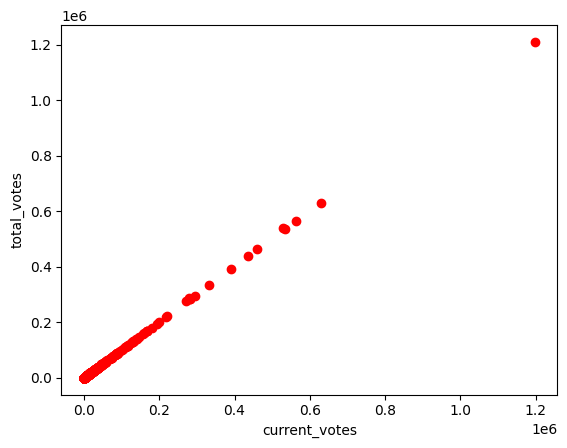

In [37]:
plt.scatter(data['current_votes'],data['total_votes'],color='red')
plt.xlabel("current_votes")
plt.ylabel("total_votes")
plt.show()

In [41]:
x = data.iloc[:,2:4] 
x

,current_votes,total_votes
0,85415,87025
1,280039,287633
2,127181,129352
3,14154,14209
4,168312,169082
...,...,...
1020,3339,3402
1021,6553,6667
1022,2544,2653
1023,38435,38762


In [42]:
kmeans = KMeans(3)
kmeans.fit(x)

c:\Users\muthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [43]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

c:\Users\muthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 0, 0, 0])

In [45]:
data_with_clusters = data.copy()

In [46]:
data_with_clusters

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,85415,87025,100
1,Delaware,New Castle County,280039,287633,100
2,Delaware,Sussex County,127181,129352,100
3,Indiana,Adams County,14154,14209,100
4,Indiana,Allen County,168312,169082,100
...,...,...,...,...,...
1020,West Virginia,Webster County,3339,3402,100
1021,West Virginia,Wetzel County,6553,6667,100
1022,West Virginia,Wirt County,2544,2653,100
1023,West Virginia,Wood County,38435,38762,100


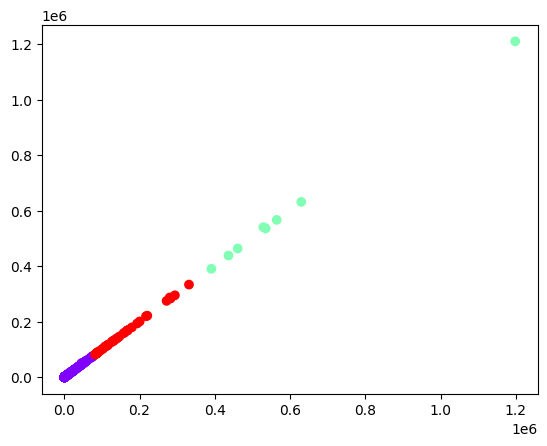

In [47]:
data_with_clusters['C'] = identified_clusters 
plt.scatter(data_with_clusters['current_votes'],data_with_clusters['total_votes'],c=data_with_clusters['C'],cmap='rainbow')

In [48]:
data_with_clusters

,state,county,current_votes,total_votes,percent,C
0,Delaware,Kent County,85415,87025,100,2
1,Delaware,New Castle County,280039,287633,100,2
2,Delaware,Sussex County,127181,129352,100,2
3,Indiana,Adams County,14154,14209,100,0
4,Indiana,Allen County,168312,169082,100,2
...,...,...,...,...,...,...
1020,West Virginia,Webster County,3339,3402,100,0
1021,West Virginia,Wetzel County,6553,6667,100,0
1022,West Virginia,Wirt County,2544,2653,100,0
1023,West Virginia,Wood County,38435,38762,100,0


c:\Users\muthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\muthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\muthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


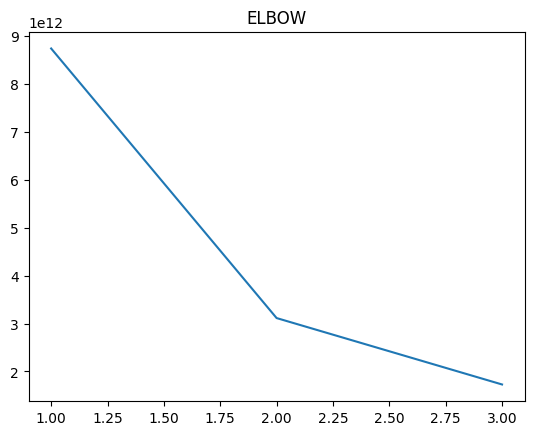

In [49]:
individual_clustering_score=[]
for i in range(1,4):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(x)
    individual_clustering_score.append(kmeans.inertia_)
plt.plot(range(1,4),individual_clustering_score)
plt.title("ELBOW")
plt.show()